In [2]:
from qiskit import QuantumCircuit, Aer, execute

# Define the oracle for the desired solution
def oracle(circuit):
    circuit.cz(0, 2)
    circuit.cz(1, 2)

# Define the diffusion operator
def diffusion(circuit):
    circuit.h(range(num_qubits))
    circuit.x(range(num_qubits))
    circuit.h(num_qubits-1)
    circuit.mct(list(range(num_qubits-1)), num_qubits-1)  
    circuit.h(num_qubits-1)
    circuit.x(range(num_qubits))
    circuit.h(range(num_qubits))

# Define the number of qubits and number of iterations
num_qubits = 3
num_iterations = 2

# Create the quantum circuit
qc = QuantumCircuit(num_qubits)

# Apply Hadamard gates to all qubits
qc.h(range(num_qubits))

# Apply the Grover iterations
for _ in range(num_iterations):
    oracle(qc)
    diffusion(qc)

# Measure the qubits
qc.measure_all()

# Simulate the circuit using the Aer simulator
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=1000)
result = job.result()

# Get the counts
counts = result.get_counts()

print(counts)


{'110': 133, '000': 122, '001': 136, '010': 116, '101': 131, '100': 138, '011': 109, '111': 115}


In [3]:
import numpy as np
from qiskit import QuantumCircuit, Aer, execute

# Function to find the greatest common divisor (GCD) of two numbers
def gcd(a, b):
    while b:
        a, b = b, a % b
    return a

# Function to find the period of a given number using continued fractions
def find_period(a, N):
    r = a
    period = 0
    while r != 1:
        r = (r * a) % N
        period += 1
    return period

# Function to perform Shor's algorithm for factorization
def shor_factorization(N):
    # Step 1: Choose a random number 'a' less than N
    a = np.random.randint(2, N)

    # Step 2: Compute the greatest common divisor (GCD) of 'a' and 'N'
    gcd_value = gcd(a, N)

    # If the GCD is not equal to 1, we have found a non-trivial factor
    if gcd_value != 1:
        return gcd_value

    # Step 3: Find the period 'r' using continued fractions
    r = find_period(a, N)

    # Step 4: Check if 'r' is even and (a^(r/2) + 1) is not congruent to 0 modulo N
    if r % 2 == 0:
        x = pow(a, r // 2, N)
        if (x + 1) % N != 0:
            p = gcd(x + 1, N)
            q = gcd(x - 1, N)
            return p, q

    # If no factors are found, return None
    return None

# Specify the number to be factorized
N = 15

# Run Shor's algorithm for factorization
factors = shor_factorization(N)

# Print the factors
if factors:
    print("Factors found:", factors)
else:
    print("No factors found.")



No factors found.


### Quantum Machine Learning for Classification:

Quantum machine learning (QML) leverages the principles of quantum mechanics to enhance classical machine learning algorithms or to design entirely new quantum algorithms. For classification tasks, quantum machine learning can provide advantages in terms of speedup or improved generalization. Below, I'll provide an overview of quantum support vector machines (QSVM) and quantum neural networks (QNN) for classification.

### Quantum Support Vector Machines (QSVM):

Quantum support vector machines aim to find hyperplanes in quantum feature spaces that separate different classes. The quantum version of the support vector machine can offer advantages in terms of computational efficiency compared to classical support vector machines.

#### Key Concepts:

1. **Quantum Feature Maps:**
   - Quantum feature maps transform classical data into quantum states. A common choice for feature maps is the quantum kernel, which is derived from classical kernels used in support vector machines.

2. **Quantum Kernel Trick:**
   - The quantum kernel trick enables the computation of inner products in quantum feature spaces without explicitly representing the high-dimensional feature vectors.

3. **Quantum Circuits:**
   - Quantum circuits are designed to implement quantum feature maps and compute the kernel matrix efficiently.

#### Quantum Support Vector Machine (QSVM) Equations:

The QSVM cost function is designed to minimize classification errors while maximizing the margin between classes. The objective function for QSVM can be formulated as:

\[ \text{Cost}(\theta) = \sum_{i=1}^{m} \left(1 - y_i \langle \psi(x_i | \theta), H \psi(x_i | \theta) \rangle \right)_+ + \lambda \|\theta\|^2 \]

Here:
- \( \theta \) represents the parameters of the quantum circuit.
- \( x_i \) is a classical input data point.
- \( \psi(x_i | \theta) \) is the quantum state associated with the input data point.
- \( y_i \) is the class label.
- \( H \) is the quantum Hamiltonian.
- The term \( \lambda \|\theta\|^2 \) is a regularization term.

The optimization problem involves finding the optimal parameters \( \theta \) that minimize the cost function.

### Quantum Neural Networks (QNN) for Classification:

Quantum neural networks are quantum counterparts to classical neural networks. They utilize quantum gates to process quantum states and can provide advantages in certain scenarios.

#### Key Concepts:

1. **Quantum Neurons:**
   - Quantum neurons are the building blocks of quantum neural networks. They operate on quantum states and perform unitary transformations.

2. **Quantum Circuits for Classification:**
   - Quantum circuits are designed to perform classification tasks, mapping input quantum states to output states representing different classes.

3. **Parameterized Quantum Circuits (PQC):**
   - Parameterized quantum circuits are used to introduce trainable parameters that can be optimized during the training process.

#### Quantum Neural Network (QNN) Equations:

The equations for a quantum neural network depend on the specific architecture and encoding scheme. However, a general form for the output of a quantum neural network could be represented as:

\[ \text{Output} = U_L(\theta_L) \dots U_2(\theta_2) U_1(\theta_1) \psi_{\text{in}} \]

Here:
- \( \psi_{\text{in}} \) is the input quantum state.
- \( U_1, U_2, \dots, U_L \) are parameterized quantum gates or layers.
- \( \theta_1, \theta_2, \dots, \theta_L \) are the trainable parameters.

### Implementation:

Implementing quantum machine learning algorithms involves using quantum programming frameworks such as Qiskit or Cirq. The actual code will depend on the chosen quantum algorithm, and you may need to use a quantum computer or a quantum simulator for execution.

Below is a simplified example using Qiskit for a quantum support vector machine:

```python
from qiskit import Aer, QuantumCircuit, transpile, assemble
from qiskit.aqua import QuantumInstance
from qiskit.aqua.algorithms import QSVM
from qiskit.aqua.components.feature_maps import SecondOrderExpansion

# Create a quantum feature map
feature_map = SecondOrderExpansion(feature_dimension, depth=2, entanglement='linear')

# Create a quantum support vector machine
qsvm = QSVM(feature_map, training_dataset, test_dataset)

# Run the quantum support vector machine
result = qsvm.run(QuantumInstance(Aer.get_backend('qasm_simulator')))

# Get the classification result
predicted_labels = result['predicted_labels']
```

This is a simplified example, and the actual implementation details will depend on the specific quantum machine learning algorithm, feature map, and dataset you are working with. Additionally, you may need to tailor the implementation to run on actual quantum hardware if available.

Remember to consult the documentation of the specific quantum programming framework you are using for more detailed guidance.

In [1]:
from qiskit import Aer, QuantumCircuit, transpile, assemble
from qiskit.aqua import QuantumInstance
from qiskit.aqua.algorithms import QSVM
from qiskit.aqua.components.feature_maps import SecondOrderExpansion

# Create a quantum feature map
feature_map = SecondOrderExpansion(feature_dimension, depth=2, entanglement='linear')

# Create a quantum support vector machine
qsvm = QSVM(feature_map, training_dataset, test_dataset)

# Run the quantum support vector machine
result = qsvm.run(QuantumInstance(Aer.get_backend('qasm_simulator')))

# Get the classification result
predicted_labels = result['predicted_labels']

ImportError: cannot import name 'BaseBackend' from 'qiskit.providers' (C:\Users\yashr\Anaconda3\lib\site-packages\qiskit\providers\__init__.py)

Quantum Neural Networks (QNNs) are a type of neural network that leverage the principles of quantum mechanics to perform certain computations. They are designed to process information using quantum bits (qubits) and quantum gates, allowing for the exploitation of quantum parallelism and entanglement. Below is an overview of Quantum Neural Networks, along with some information and equations:

### Overview:

1. **Qubits:**
   - Qubits are the fundamental units of quantum information. Unlike classical bits that can exist in a state of 0 or 1, qubits can exist in a superposition of both states simultaneously.

2. **Quantum Gates:**
   - Quantum gates are the building blocks of quantum circuits. They perform operations on qubits and enable the manipulation of quantum states. Common quantum gates include Hadamard gate (H), Pauli gates (X, Y, Z), and CNOT gate.

3. **Quantum Superposition:**
   - Qubits can exist in a superposition of states, representing a combination of 0 and 1. The state of a single qubit can be represented as \(|\psi\rangle = \alpha|0\rangle + \beta|1\rangle\), where \(\alpha\) and \(\beta\) are complex numbers.

4. **Quantum Entanglement:**
   - Entanglement is a quantum phenomenon where two or more qubits become correlated in such a way that the state of one qubit is dependent on the state of another, even when separated by large distances.

### Quantum Neural Network Architecture:

1. **Quantum Input Layer:**
   - Quantum states are prepared to represent classical input data using qubits.

2. **Quantum Hidden Layers:**
   - Quantum gates are applied to the qubits in superposition, allowing for the exploration of many possible states simultaneously.

3. **Quantum Measurement:**
   - The final state of the quantum system is measured, collapsing the superposition into a classical outcome.

4. **Classical Post-Processing:**
   - The classical outcome is then post-processed using classical neural network layers to produce the final result.

### Equations:

1. **Quantum State Vector:**
   - The state of a quantum system with \(n\) qubits can be represented as a vector in a complex Hilbert space: \[|\psi\rangle = \sum_{i=0}^{2^n-1} c_i |i\rangle\]
   - Here, \(c_i\) are complex coefficients, and \(|i\rangle\) represents the basis state corresponding to the binary representation of \(i\).

2. **Quantum Gates:**
   - Quantum gates are represented by unitary matrices. For example, the Hadamard gate (H) can be represented as:
     \[H = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}\]

3. **Quantum Measurement:**
   - The outcome of a quantum measurement is probabilistic. The probability of measuring a particular state \(|i\rangle\) is given by the Born rule: \[P(i) = |c_i|^2\]

4. **Quantum Circuit:**
   - The evolution of a quantum state through a quantum circuit can be described by the unitary transformation: \[|\psi'\rangle = U |\psi\rangle\]
   - Here, \(U\) is the unitary matrix representing the quantum circuit.

### Challenges and Considerations:

1. **Quantum Error Correction:**
   - Quantum systems are susceptible to errors due to decoherence and other environmental factors. Quantum error correction techniques are crucial for maintaining the integrity of quantum computations.

2. **No-Cloning Theorem:**
   - Unlike classical bits, quantum states cannot be cloned perfectly. This has implications for certain quantum machine learning algorithms.

3. **Hybrid Quantum-Classical Systems:**
   - Many practical implementations involve a combination of classical and quantum processing, known as hybrid quantum-classical systems.

4. **Training Quantum Neural Networks:**
   - Training quantum neural networks involves optimizing the parameters of quantum gates. Techniques like parameter-shift rule and quantum gradient descent are used.

5. **Quantum Circuit Depth:**
   - The depth of a quantum circuit (number of gates applied) is a crucial factor. Shallow circuits are often preferred for near-term quantum devices due to decoherence.

### Quantum Neural Network Libraries:

1. **Qiskit:**
   - Developed by IBM, Qiskit is an open-source quantum computing software development framework that includes tools for building and simulating quantum neural networks.

2. **Cirq:**
   - Developed by Google, Cirq is a library for designing, simulating, and running quantum circuits on Google's quantum processors. It provides support for building quantum neural networks.

3. **PennyLane:**
   - PennyLane is a cross-platform Python library for quantum machine learning. It integrates with popular machine learning libraries and supports quantum neural networks.

Quantum neural networks are an active area of research, and their development and application continue to evolve as quantum computing technologies progress.

Optimized Parameters: [2.65674733]


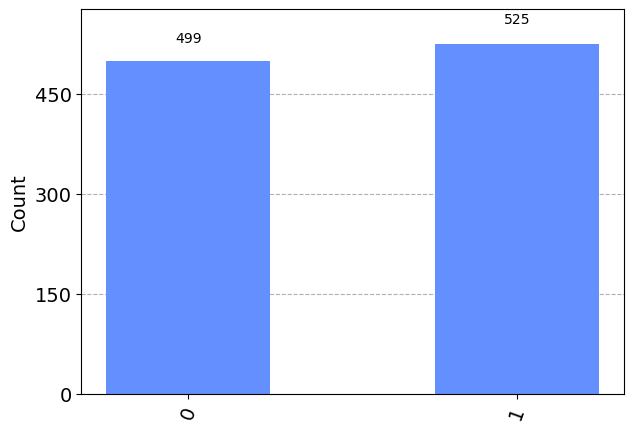

In [2]:
from qiskit import QuantumCircuit, Aer, transpile, assemble, execute
from qiskit.visualization import plot_histogram
import numpy as np

# Define the quantum neural network
def quantum_neural_network(params):
    circuit = QuantumCircuit(1, 1)
    
    # Input layer (prepare qubit in superposition)
    circuit.h(0)
    
    # Quantum processing layer (parameterized rotations)
    circuit.rx(params[0], 0)
    
    # Measurement
    circuit.measure(0, 0)
    
    return circuit

# Define a simple cost function to optimize
def cost_function(params):
    qc = quantum_neural_network(params)
    backend = Aer.get_backend('qasm_simulator')
    shots = 1024
    job = execute(qc, backend, shots=shots)
    counts = job.result().get_counts()
    
    # For simplicity, using the probability of measuring '0' as the cost
    cost = counts.get('0', 0) / shots
    
    return 1 - cost  # We want to maximize the probability of measuring '0'

# Optimize the quantum neural network
from scipy.optimize import minimize

initial_params = np.random.rand(1)  # Initial random parameters
result = minimize(cost_function, initial_params, method='COBYLA')

optimized_params = result.x
print("Optimized Parameters:", optimized_params)

# Visualize the quantum neural network output
optimized_circuit = quantum_neural_network(optimized_params)
backend = Aer.get_backend('qasm_simulator')
shots = 1024
result = execute(optimized_circuit, backend, shots=shots).result()
counts = result.get_counts()
plot_histogram(counts)


In [3]:
import numpy as np

def apply_gate(quantum_state, gate, target_qubits):
    """
    Applies a quantum gate to a specified set of target qubits.

    Parameters:
    - quantum_state (list): The current quantum state of the system.
    - gate (str): The type of quantum gate to apply (e.g., 'X', 'H', 'U').
    - target_qubits (list): The list of target qubits to which the gate will be applied.

    Returns:
    - quantum_state: The updated quantum state after applying the gate.
    """

    # Check if the target qubits are valid
    num_qubits = int(np.log2(len(quantum_state)))
    if any(qubit < 0 or qubit >= num_qubits for qubit in target_qubits):
        raise ValueError("Invalid target qubits.")

    # Perform the gate operation based on the specified gate type
    if gate == 'X':  # Pauli-X gate
        quantum_state = apply_pauli_x(quantum_state, target_qubits)
    elif gate == 'H':  # Hadamard gate
        quantum_state = apply_hadamard(quantum_state, target_qubits)
    elif gate == 'U':  # Custom unitary gate (placeholder, replace with actual implementation)
        quantum_state = apply_custom_unitary(quantum_state, target_qubits)
    else:
        raise ValueError(f"Unsupported gate type: {gate}")

    return quantum_state

# Example implementations for specific gates

def apply_pauli_x(quantum_state, target_qubits):
    """
    Applies the Pauli-X gate to the specified target qubits.

    Parameters:
    - quantum_state (list): The current quantum state of the system.
    - target_qubits (list): The list of target qubits to which the gate will be applied.

    Returns:
    - quantum_state: The updated quantum state after applying the Pauli-X gate.
    """
    # Implement Pauli-X gate operation
    # (For simplicity, this implementation assumes a perfect quantum gate without errors)
    for i in target_qubits:
        index = 2**(num_qubits - i - 1)
        quantum_state[index] *= -1

    return quantum_state

def apply_hadamard(quantum_state, target_qubits):
    """
    Applies the Hadamard gate to the specified target qubits.

    Parameters:
    - quantum_state (list): The current quantum state of the system.
    - target_qubits (list): The list of target qubits to which the gate will be applied.

    Returns:
    - quantum_state: The updated quantum state after applying the Hadamard gate.
    """
    # Implement Hadamard gate operation
    # (For simplicity, this implementation assumes a perfect quantum gate without errors)
    hadamard_matrix = 1/np.sqrt(2) * np.array([[1, 1], [1, -1]])
    for i in target_qubits:
        indices = [2**(num_qubits - i - 1), 2**(num_qubits - i - 1) + 1]
        quantum_state[indices] = np.dot(hadamard_matrix, quantum_state[indices])

    return quantum_state

def apply_custom_unitary(quantum_state, target_qubits):
    """
    Applies a custom unitary gate to the specified target qubits.

    Parameters:
    - quantum_state (list): The current quantum state of the system.
    - target_qubits (list): The list of target qubits to which the gate will be applied.

    Returns:
    - quantum_state: The updated quantum state after applying the custom unitary gate.
    """
    # Placeholder for custom unitary gate implementation
    # Replace this with the actual implementation based on the specific gate matrix
    pass

# Example usage:
# quantum_state = initialize_qubits(3)
# quantum_state = apply_gate(quantum_state, 'H', [0])
# quantum_state = apply_gate(quantum_state, 'X', [1])


In [1]:
from qiskit import QuantumCircuit, Aer, transpile, assemble

def classical_to_quantum(pixel_value):
    """
    Convert a classical pixel value to a quantum state.
    """
    qubit_representation = QuantumCircuit(1, 1)
    
    # Encode the pixel value using rotations
    qubit_representation.ry(pixel_value, 0)
    
    return qubit_representation

def encode_image(classical_image):
    """
    Encode a classical image into a quantum state.
    """
    num_pixels = len(classical_image)
    
    # Create a quantum circuit with enough qubits
    quantum_circuit = QuantumCircuit(num_pixels, num_pixels)
    
    # Encode each pixel value
    for i, pixel_value in enumerate(classical_image):
        qubit_representation = classical_to_quantum(pixel_value)
        quantum_circuit.compose(qubit_representation, [i], inplace=True)
    
    return quantum_circuit

def simulate_quantum_image(quantum_circuit):
    """
    Simulate a quantum image representation and measure the final state.
    """
    simulator = Aer.get_backend('qasm_simulator')
    quantum_circuit.measure(range(quantum_circuit.num_qubits), range(quantum_circuit.num_qubits))
    
    transpiled_circuit = transpile(quantum_circuit, simulator)
    qobj = assemble(transpiled_circuit)
    result = simulator.run(qobj).result()
    
    # Extract and return the measured classical state
    counts = result.get_counts()
    classical_state = int(max(counts, key=counts.get), 2)
    
    return classical_state

# Example usage
classical_image = [0.1, 0.5, 0.8, 0.3]  # Replace with your pixel values
quantum_circuit = encode_image(classical_image)
quantum_representation = simulate_quantum_image(quantum_circuit)

print("Classical Image:", classical_image)
print("Quantum Representation:", quantum_representation)


C:\Users\yashr\AppData\Local\Temp\ipykernel_5448\1992223853.py:39: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = simulator.run(qobj).result()


TypeError: _run_qobj() got multiple values for argument 'parameter_binds'

In [48]:
from qiskit.visualization import array_to_latex
from qiskit.quantum_info import Statevector
from qiskit.quantum_info.operators import Operator
import math

psi1 = Statevector([math.cos(math.pi / 8), math.sin(math.pi / 8)])
psi2 = Statevector([math.cos(10 * math.pi / 8), math.sin(10 * math.pi / 8)])

# When given a Statevector input, the Operator function returns the outer
# product of that state vector with itself — or, in other words, the
# product of the vector times its conjugate transpose.

H = Operator(psi1) - Operator(psi2)

display(array_to_latex(H))

<IPython.core.display.Latex object>

In [49]:
from math import pi, cos, sin
from qiskit import QuantumCircuit

theta = 1  # Can be changed to any value between 0 and 1

qc = QuantumCircuit(2, 1)

# Prepare eigenvector, which is the |1> state

qc.x(1)
qc.barrier()

# Implement the estimation procedure
qc.h(0)
qc.cp(2 * pi * theta, 0, 1)
qc.h(0)
qc.barrier()

# Perform the final measurement
qc.measure(0, 0)

# Draw the circuit
display(qc.draw())

░ ┌───┐        ┌───┐ ░ ┌─┐
q_0: ──────░─┤ H ├─■──────┤ H ├─░─┤M├
     ┌───┐ ░ └───┘ │P(2π) └───┘ ░ └╥┘
q_1: ┤ X ├─░───────■────────────░──╫─
     └───┘ ░                    ░  ║ 
c: 1/══════════════════════════════╩═
                                   0

In [50]:
from qiskit.primitives import Sampler

display(Sampler().run(qc).result().quasi_dists[0])

{0: 1.0}

In [51]:
display({   # Calculate predicted results
    0: cos(pi * theta) ** 2,
    1: sin(pi * theta) ** 2
})

{0: 1.0, 1: 1.4997597826618576e-32}

In [52]:
from math import pi
from qiskit import QuantumCircuit

theta = 0.7
qc = QuantumCircuit(3, 2)

# Prepare the eigenvector
qc.x(2)
qc.barrier()

# The initial Hadamard gates
qc.h(0)
qc.h(1)
qc.barrier()

# The controlled unitary gates
qc.cp(2 * pi * theta, 0, 2)
qc.cp(2 * pi * (2 * theta), 1, 2)
qc.barrier()

# An implementation of the inverse of the two-qubit QFT
qc.swap(0, 1)
qc.h(0)
qc.cp(-pi / 2, 0, 1)
qc.h(1)
qc.barrier()

# And finally the measurements
qc.measure([0, 1], [0, 1])
display(qc.draw())

░ ┌───┐ ░                       ░    ┌───┐                ░ ┌─┐   
q_0: ──────░─┤ H ├─░──■────────────────────░──X─┤ H ├─■──────────────░─┤M├───
           ░ ├───┤ ░  │                    ░  │ └───┘ │P(-π/2) ┌───┐ ░ └╥┘┌─┐
q_1: ──────░─┤ H ├─░──┼─────────■──────────░──X───────■────────┤ H ├─░──╫─┤M├
     ┌───┐ ░ └───┘ ░  │P(7π/5)  │P(14π/5)  ░                   └───┘ ░  ║ └╥┘
q_2: ┤ X ├─░───────░──■─────────■──────────░─────────────────────────░──╫──╫─
     └───┘ ░       ░                       ░                         ░  ║  ║ 
c: 2/═══════════════════════════════════════════════════════════════════╩══╩═
                                                                        0  1

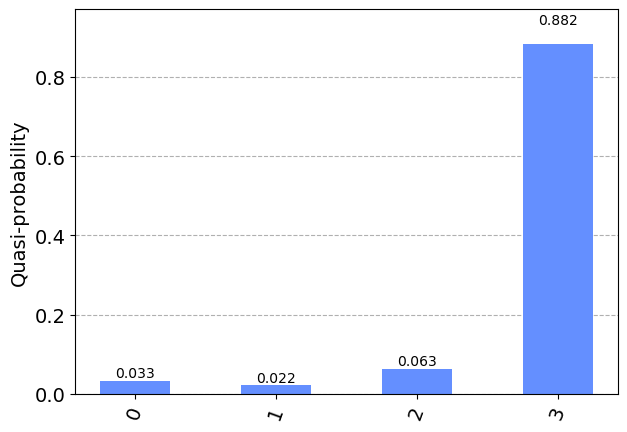

In [53]:
from qiskit.visualization import plot_histogram

result = Sampler().run(qc).result()
display(plot_histogram(result.quasi_dists))

In [54]:
from qiskit.circuit.library import QFT

display(QFT(4).decompose().draw())

┌───┐»
q_0: ──────────────────────────────────────■─────────────■────────■───────┤ H ├»
                                           │       ┌───┐ │        │P(π/2) └───┘»
q_1: ────────────────────■────────■────────┼───────┤ H ├─┼────────■─────────X──»
                   ┌───┐ │        │P(π/2)  │       └───┘ │P(π/4)            │  »
q_2: ──────■───────┤ H ├─┼────────■────────┼─────────────■──────────────────X──»
     ┌───┐ │P(π/2) └───┘ │P(π/4)           │P(π/8)                             »
q_3: ┤ H ├─■─────────────■─────────────────■───────────────────────────────────»
     └───┘                                                                     »
«        
«q_0: ─X─
«      │ 
«q_1: ─┼─
«      │ 
«q_2: ─┼─
«      │ 
«q_3: ─X─
«

In [55]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import QFT

theta = 0.7
m = 3  # Number of control qubits

control_register = QuantumRegister(m, name="Control")
target_register = QuantumRegister(1, name="|ψ>")
output_register = ClassicalRegister(m, name="Result")
qc = QuantumCircuit(control_register, target_register, output_register)

# Prepare the eigenvector |ψ>
qc.x(target_register)
qc.barrier()

# Perform phase estimation
for index, qubit in enumerate(control_register):
    qc.h(qubit)
    for _ in range(2**index):
        qc.cp(2 * pi * theta, qubit, target_register)
qc.barrier()

# Do inverse quantum Fourier transform
qc.compose(
    QFT(m, inverse=True),
    inplace=True
)

# Measure everything
qc.measure(range(m), range(m))
display(qc.draw())

░ ┌───┐                                                  »
Control_0: ──────░─┤ H ├─■────────────────────────────────────────────────»
                 ░ ├───┤ │                                                »
Control_1: ──────░─┤ H ├─┼─────────■─────────■────────────────────────────»
                 ░ ├───┤ │         │         │                            »
Control_2: ──────░─┤ H ├─┼─────────┼─────────┼─────────■─────────■────────»
           ┌───┐ ░ └───┘ │P(7π/5)  │P(7π/5)  │P(7π/5)  │P(7π/5)  │P(7π/5) »
      |ψ>: ┤ X ├─░───────■─────────■─────────■─────────■─────────■────────»
           └───┘ ░                                                        »
 Result: 3/═══════════════════════════════════════════════════════════════»
                                                                          »
«                                ░ ┌──────────┐┌─┐      
«Control_0: ─────────────────────░─┤0         ├┤M├──────
«                                ░ │          │└╥┘┌─┐   
«Control_1: ─────────────────────░─┤1 IQFT_dg ├─╫─┤M├───
«                                ░ │          │ ║ └╥┘┌─┐
«Control_2: ─■─────────■─────────░─┤2         ├─╫──╫─┤M├
«            │P(7π/5)  │P(7π/5)  ░ └──────────┘ ║  ║ └╥┘
«      |ψ>: ─■─────────■─────────░──────────────╫──╫──╫─
«                                ░              ║  ║  ║ 
« Result: 3/════════════════════════════════════╩══╩══╩═
«                                               0  1  2

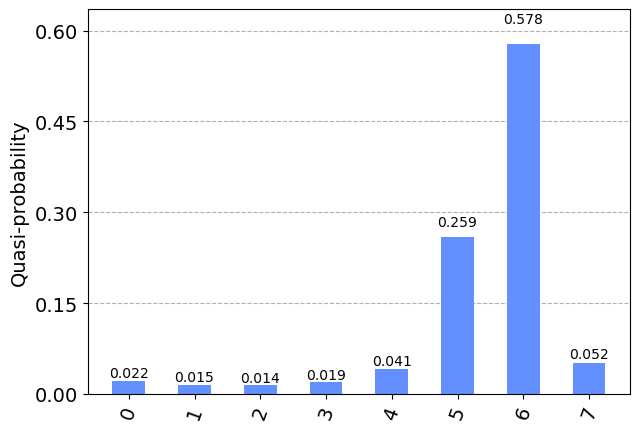

In [56]:
result = Sampler().run(qc).result()
display(plot_histogram(result.quasi_dists))

In [57]:
most_probable = max(result.quasi_dists[0], key=result.quasi_dists[0].get)

print(f"Most probable output: {most_probable}")
print(f"Estimated theta: {most_probable/2**m}")

Most probable output: 6
Estimated theta: 0.75


In [58]:
N = 21
a = 17
max_power = 12

print("k \t a^k \n")
for k in range(1, max_power + 1):
    print(
        "%2d \t %2d" % (k, a**k % N)
    )  # The % operation computes the remainder modulo N

k 	 a^k 

 1 	 17
 2 	 16
 3 	 20
 4 	  4
 5 	  5
 6 	  1
 7 	 17
 8 	 16
 9 	 20
10 	  4
11 	  5
12 	  1


In [59]:
N = 21
a = 18
max_power = 12

print("k \t a^k \n")
for k in range(1, max_power + 1):
    print("%2d \t %2d" % (k, a**k % N))

k 	 a^k 

 1 	 18
 2 	  9
 3 	 15
 4 	 18
 5 	  9
 6 	 15
 7 	 18
 8 	  9
 9 	 15
10 	 18
11 	  9
12 	 15


In [60]:
def c_amod15(a):
    """
    Controlled multiplication by a mod 15.
    This is hard-coded for simplicity.
    """
    if a not in [2, 4, 7, 8, 11, 13]:
        raise ValueError("'a' must not have common factors with 15")
    U = QuantumCircuit(4)
    if a in [2, 13]:
        U.swap(2, 3)
        U.swap(1, 2)
        U.swap(0, 1)
    if a in [7, 8]:
        U.swap(0, 1)
        U.swap(1, 2)
        U.swap(2, 3)
    if a in [4, 11]:
        U.swap(1, 3)
        U.swap(0, 2)
    if a in [7, 11, 13]:
        for q in range(4):
            U.x(q)
    U = U.to_gate()
    U.name = f"{a} mod 15"
    c_U = U.control()
    return c_U

In [61]:
def phase_estimation(
        controlled_operation: QuantumCircuit,
        psi_prep: QuantumCircuit,
        precision: int
    ):
    """
    Carry out phase estimation on a simulator.
    Args:
        controlled_operation: The operation to perform phase estimation on,
                              controlled by one qubit.
        psi_prep: Circuit to prepare |ψ>
        precision: Number of counting qubits to use
    Returns:
        float: Best guess for phase of U|ψ>
    """
    control_register = QuantumRegister(precision)
    output_register = ClassicalRegister(precision)

    target_register = QuantumRegister(psi_prep.num_qubits)
    qc = QuantumCircuit(control_register, target_register, output_register)

    # Prepare |ψ>
    qc.compose(psi_prep,
               qubits=target_register,
               inplace=True)

    # Do phase estimation
    for index, qubit in enumerate(control_register):
        qc.h(qubit)
        for _ in range(2**index):
            qc.compose(
                controlled_operation,
                qubits=[qubit] + list(target_register),
                inplace=True,
            )

    qc.compose(
        QFT(precision, inverse=True),
        qubits=control_register,
        inplace=True
    )

    qc.measure(control_register, output_register)

    measurement = Sampler().run(qc, shots=1).result().quasi_dists[0].popitem()[0]
    return measurement / 2**precision

In [62]:
psi_prep = QuantumCircuit(4)
psi_prep.x(0)
display(psi_prep.draw())

┌───┐
q_0: ┤ X ├
     └───┘
q_1: ─────
          
q_2: ─────
          
q_3: ─────

In [63]:
from fractions import Fraction
from math import gcd

a = 8
N = 15

FACTOR_FOUND = False
ATTEMPT = 0
while not FACTOR_FOUND:
    ATTEMPT += 1
    print(f"\nAttempt {ATTEMPT}")

    phase = phase_estimation(
        c_amod15(a),
        psi_prep,
        precision=8
    )
    frac = Fraction(phase).limit_denominator(N)
    r = frac.denominator
    if phase != 0:
        # Guess for a factor is gcd(x^{r/2} - 1 , 15)
        guess = gcd(a ** (r // 2) - 1, N)
        if guess not in [1, N] and (N % guess) == 0:
            # Guess is a factor!
            print(f"Non-trivial factor found: {guess}")
            FACTOR_FOUND = True


Attempt 1
Non-trivial factor found: 3


In [3]:
import datetime
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from qiskit_ibm_runtime import Estimator, Session, QiskitRuntimeService, Options
from qiskit.quantum_info import SparsePauliOp
from qiskit import QuantumCircuit

# Add your token below
service = QiskitRuntimeService(channel="ibm_quantum")

Trotter circuit with 1 Trotter steps


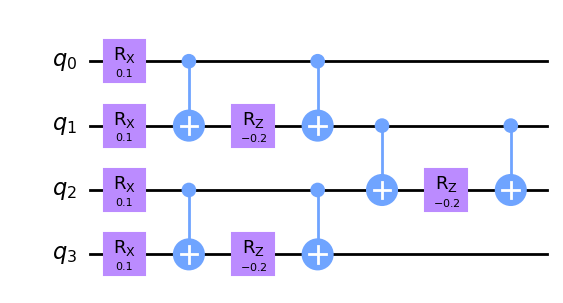

Trotter circuit with 2 Trotter steps


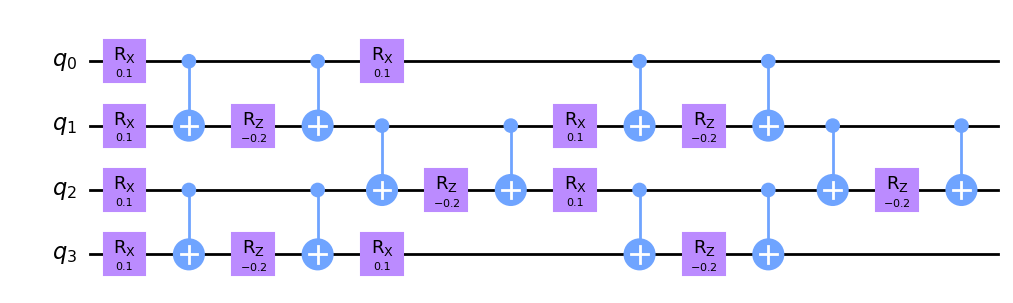

Trotter circuit with 3 Trotter steps


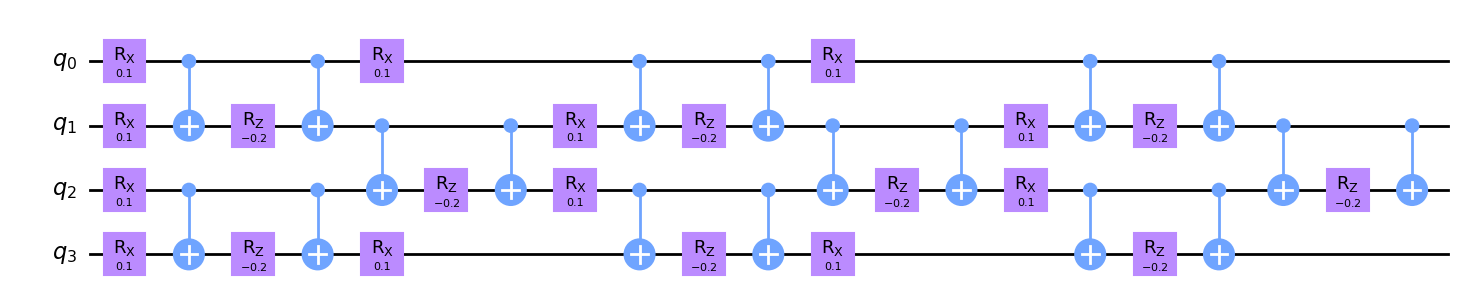

Trotter circuit with 4 Trotter steps


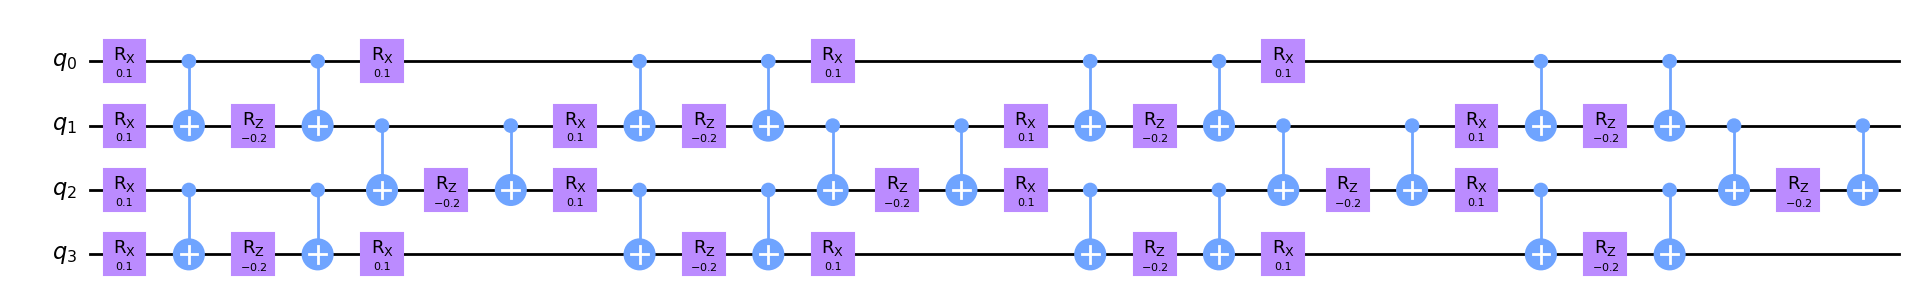

Trotter circuit with 5 Trotter steps


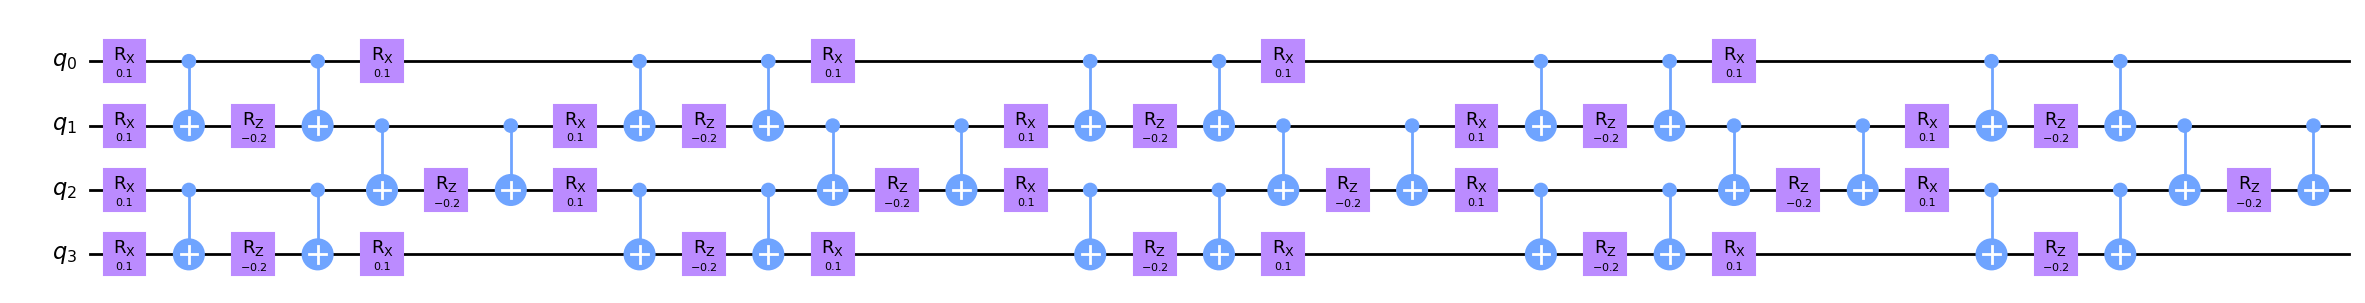

In [6]:
qubits = 4
trotter_layer = QuantumCircuit(qubits)
trotter_layer.rx(0.1, range(qubits))
trotter_layer.cx(0, 1)
trotter_layer.cx(2, 3)
trotter_layer.rz(-0.2, [1, 3])
trotter_layer.cx(0, 1)
trotter_layer.cx(2, 3)
trotter_layer.cx(1, 2)
trotter_layer.rz(-0.2, 2)
trotter_layer.cx(1, 2)

num_steps = 6
trotter_circuit_list = []
for i in range(1, num_steps):
    trotter_circuit = QuantumCircuit(qubits)
    for _ in range(i):
        trotter_circuit = trotter_circuit.compose(trotter_layer)
    trotter_circuit_list.append(trotter_circuit)
    print(f"Trotter circuit with {i} Trotter steps")
    display(trotter_circuit.draw(fold=-1, output="mpl"))

In [7]:
obs = SparsePauliOp("Z" * qubits)
obs_list = [obs] * len(trotter_circuit_list)

In [8]:
# Select the simulator with the fewest number of jobs in the queue
backend_simulator = service.least_busy(simulator=True, operational=True)
backend_simulator.name

'ibmq_qasm_simulator'

In [9]:
options = Options()
options.execution.shots = 1000
options.optimization_level = 0  # No optimization
options.resilience_level = 0  # No mitigation

# Initialize your session
session = Session(backend=backend_simulator)

estimator_sim = Estimator(session=session, options=options)
job_sim = estimator_sim.run(circuits=trotter_circuit_list, observables=obs_list)
print("job id:", job_sim.job_id)
print(job_sim.result())

expvals_ideal = job_sim.result().values
expvals_ideal_variance = [
    metadata["variance"] / metadata["shots"] for metadata in job_sim.result().metadata
]
std_error_ideal = np.sqrt(expvals_ideal_variance)

# Close session
session.close()

job id: <bound method JobV1.job_id of <RuntimeJob('clgt21m91som02n2buhg', 'estimator')>>
EstimatorResult(values=array([0.966, 0.942, 0.864, 0.768, 0.638]), metadata=[{'variance': 0.06684400000000001, 'shots': 1000}, {'variance': 0.11263600000000007, 'shots': 1000}, {'variance': 0.25350400000000006, 'shots': 1000}, {'variance': 0.410176, 'shots': 1000}, {'variance': 0.592956, 'shots': 1000}])


In [10]:
# Select the backend with the fewest number of jobs in the queue
backend = service.least_busy(simulator=False, operational=True)
backend.name

'ibm_lagos'

In [ ]:
options = Options()
options.execution.shots = 1000
options.optimization_level = 0  # No optimization
options.resilience_level = 0  # No error mitigation

# Initialize your session
session = Session(backend=backend)

estimator = Estimator(session=session, options=options)
job = estimator.run(circuits=trotter_circuit_list, observables=obs_list)
print("job id:", job.job_id)
print(job.result())

expvals_unmit = job.result().values
expvals_unmit_variance = [
    metadata["variance"] / metadata["shots"] for metadata in job.result().metadata
]
std_error_unmit = np.sqrt(expvals_unmit_variance)

job id: <bound method JobV1.job_id of <RuntimeJob('cngx250xar800081rgcg', 'estimator')>>


In [ ]:
options = Options()
options.execution.shots = 1000
options.optimization_level = 3  # Dynamical decoupling
options.resilience_level = 0  # No error mitigation

estimator = Estimator(session=session, options=options)
job_dd = estimator.run(circuits=trotter_circuit_list, observables=obs_list)
print("job id:", job_dd.job_id)
print(job_dd.result())

expvals_unmit_dd = job_dd.result().values
expvals_unmit_dd_variance = [
    metadata["variance"] / metadata["shots"] for metadata in job_dd.result().metadata
]
std_error_dd = np.sqrt(expvals_unmit_dd_variance)

In [ ]:
plt.title("Trotter circuits expectation value")
plt.errorbar(
    range(1, num_steps),
    expvals_ideal,
    std_error_ideal,
    fmt="o",
    linestyle="--",
    capsize=4,
    c="red",
    label="Ideal",
)
plt.errorbar(
    range(1, num_steps),
    expvals_unmit,
    std_error_unmit,
    fmt="o",
    linestyle="-",
    capsize=4,
    c="green",
    label="No mitigation",
)
plt.errorbar(
    range(1, num_steps),
    expvals_unmit_dd,
    std_error_dd,
    fmt="o",
    linestyle="-",
    capsize=4,
    c="blue",
    label="Dynamical decoupling",
)

plt.ylabel(f"$\langle ZZZZ \\rangle$")
plt.xlabel("No. Trotter Steps")
plt.xticks([1, 2, 3, 4, 5])
plt.legend()
plt.show()

In [ ]:
options = Options()
options.resilience_level = 1  # T-REx
options.optimization_level = 0  # No optimization
options.execution.shots = 1000

estimator = Estimator(session=session, options=options)
job_trex = estimator.run(circuits=trotter_circuit_list, observables=obs_list)
print("job id:", job_trex.job_id)
print(job_trex.result())

expvals_unmit_trex = job_trex.result().values
expvals_unmit_trex_variance = [
    metadata["variance"] / metadata["shots"] for metadata in job_trex.result().metadata
]
std_error_trex = np.sqrt(expvals_unmit_trex_variance)

In [ ]:
plt.title("Trotter circuits expectation value")
plt.errorbar(
    range(1, num_steps),
    expvals_ideal,
    std_error_ideal,
    fmt="o",
    linestyle="--",
    capsize=4,
    c="red",
    label="Ideal",
)
plt.errorbar(
    range(1, num_steps),
    expvals_unmit,
    std_error_unmit,
    fmt="o",
    linestyle="-",
    capsize=4,
    c="green",
    label="No mitigation",
)
plt.errorbar(
    range(1, num_steps),
    expvals_unmit_trex,
    std_error_trex,
    fmt="o",
    linestyle="-",
    capsize=4,
    c="violet",
    label="T-REx",
)

plt.ylabel(f"$\langle ZZZZ \\rangle$")
plt.xlabel("No. Trotter Steps")
plt.xticks([1, 2, 3, 4, 5])
plt.legend()
plt.show()

In [ ]:
options = Options()
options.execution.shots = 1000
options.optimization_level = 0  # No optimization
options.resilience_level = 2  # ZNE

estimator = Estimator(session=session, options=options)
job_zne = estimator.run(circuits=trotter_circuit_list, observables=obs_list)
print("job id:", job_zne.job_id)
print(job_zne.result())

expvals_unmit_zne = job_zne.result().values
# Standard error: coming soon!

In [ ]:
plt.title("Trotter circuits expectation value")
plt.errorbar(
    range(1, num_steps),
    expvals_ideal,
    std_error_ideal,
    fmt="o",
    linestyle="--",
    capsize=4,
    c="red",
    label="Ideal",
)
plt.errorbar(
    range(1, num_steps),
    expvals_unmit,
    std_error_unmit,
    fmt="o",
    linestyle="-",
    capsize=4,
    c="green",
    label="No mitigation",
)
plt.errorbar(
    range(1, num_steps),
    expvals_unmit_zne,
    [0] * (num_steps - 1),
    fmt="o",
    linestyle="-",
    capsize=4,
    c="cyan",
    label="ZNE",
)

plt.xlabel("No. Trotter Steps")
plt.ylabel(f"$\langle ZZZZ \\rangle$")
plt.xticks([1, 2, 3, 4, 5])
plt.legend()
plt.show()



In [1]:
from typing import List, Optional

from qiskit import transpile, QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.result import marginal_counts

import warnings
warnings.filterwarnings("ignore")

In [1]:
# Importing Required Libraries
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import IBMQ, Aer, execute

# Creating Registers
q = QuantumRegister(3, 'q')
c0 = ClassicalRegister(1, 'c0')
c1 = ClassicalRegister(1, 'c1')
c2 = ClassicalRegister(1, 'c2')

# Initializing Quantum Circuit
qc = QuantumCircuit(q, c0, c1, c2)

# Creating Bell Pair
qc.h(q[1])
qc.cx(q[1], q[2])

# Applying CNOT and Hadamard Gates
qc.cx(q[0], q[1])
qc.h(q[0])

# Applying Measurements
qc.measure(q[0], c0)
qc.measure(q[1], c1)

qc.cx(q[1], q[2])
qc.cz(q[0], q[2])

qc.measure(q[2], c2)

# Executing the Circuit
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1024)
result = job.result()

# Printing the Result
print(result.get_counts(qc))


{'0 0 0': 238, '0 1 1': 240, '0 0 1': 282, '0 1 0': 264}


In [1]:
class Universe:
    def __init__(self):
        self.theory_of_everything = None

    def explore(self):
        print("Exploring the mysteries of the universe...")

    def propose_theory_of_everything(self, theory):
        self.theory_of_everything = theory
        print(f"A new theory of everything has been proposed: {theory}")

class StringTheory:
    def __init__(self):
        self.dimensions = 10

    def describe(self):
        print(f"String theory suggests {self.dimensions} dimensions.")

class QuantumGravity:
    def __init__(self):
        self.description = "Unifying gravity with quantum mechanics."

    def explain(self):
        print(f"Quantum gravity: {self.description}")

# Create the universe
our_universe = Universe()

# Explore and propose theories
our_universe.explore()

# Propose String Theory
string_theory = StringTheory()
our_universe.propose_theory_of_everything(string_theory)

# Propose Quantum Gravity
quantum_gravity = QuantumGravity()
our_universe.propose_theory_of_everything(quantum_gravity)


Exploring the mysteries of the universe...
A new theory of everything has been proposed: <__main__.StringTheory object at 0x000001A7D79FAC50>
A new theory of everything has been proposed: <__main__.QuantumGravity object at 0x000001A7D79EACD0>
